# K-means

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Generación de datos de ejemplo
Generamos unas cuantas distribuciones para trabajar con un ejemplo básico de clusterización

(750, 2)


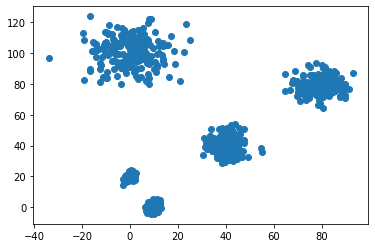

In [2]:
np.random.seed(700)
a = np.random.multivariate_normal([10,0],[[3,1],[1,4]], size = [100,])
b = np.random.multivariate_normal([0,20], [[3,1],[1,4]], size = [50,])
c = np.random.multivariate_normal([40,40],[[20,1],[1,30]], size=[200,])
d = np.random.multivariate_normal([80,80],[[30,1],[1,30]], size=[200,])
e = np.random.multivariate_normal([0,100],[[100,1],[1,100]], size=[200,])

data = np.concatenate((a,b,c,d,e))
print(data.shape)

plt.scatter(data[:,0], data[:,1])
plt.show()

In [3]:
from sklearn.cluster import KMeans
from sklearn import datasets

In [4]:
numero_clusters_deseados = 5
model = KMeans(n_clusters=numero_clusters_deseados)
model.fit(data)

KMeans(n_clusters=5)

### Centroides

In [5]:
model.cluster_centers_

array([[ 7.94686459e+01,  7.98938538e+01],
       [ 4.22461857e-02,  1.00792270e+02],
       [ 4.03073292e+01,  3.98251328e+01],
       [ 1.02139334e+01,  4.22286356e-01],
       [-1.84751059e-01,  1.92042132e+01]])

## Eficacia del modelo

In [6]:
model.inertia_ #valor de la suma del cuadrado internos de los errores

53863.53856818679

## Asociar los datos a su cluster

In [7]:
df = pd.DataFrame({
    "x": data[:,0],
    "y": data[:,1],
    "cluster": pd.Series(model.labels_)
})

df.head()

,x,y,cluster
0,8.183323,0.422513,3
1,10.057270,2.649059,3
2,6.684306,-2.384492,3
3,12.394945,2.461775,3
4,10.812558,-3.044707,3


## Visualización del resultado
Solo lo podremos hacer cuando tengamos pocas dimensiones, ya que si no no podremos representarlo

(array([200.,   0., 200.,   0.,   0., 200.,   0., 100.,   0.,  50.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

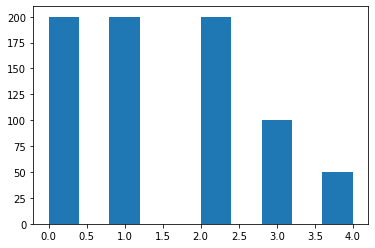

In [8]:
plt.hist(df["cluster"]) #vemos la distribución de elementos en cada cluster

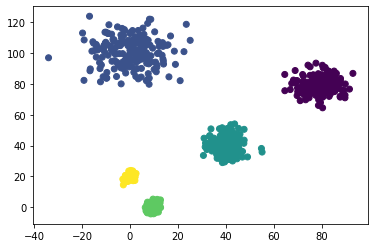

In [9]:
plt.scatter(df["x"], df["y"], c = df["cluster"])
plt.show()

## Evaluación

### Definición de funciones para la representación

In [10]:
import matplotlib.cm as cm
from scipy.spatial.distance import cdist
from sklearn.metrics import silhouette_samples, silhouette_score

In [11]:
def draw_silouette(kmeanmodel, data, K, color_palette):
    
    centers = pd.DataFrame(kmeanmodel.cluster_centers_)
    labels = kmeanmodel.labels_
    
    # si k = 1 o k = len(X), no hacemos silueta
    if 1<K<len(data):
        # preparamos el subplot
        fig, (axis1) = plt.subplots(1,1)
        fig.set_size_inches(6,4)
    
        #El primer subplot contendrá la silueta, que puede tener valores desde -1 a 1
        #En nuestro caso, ya controlamos que los valores están entre -0.1 y 1
        axis1.set_xlim([-0.1, 1.0])
        
        #El número de clusters a insertar determinará el tamaño de cada barra
        #El coeficiente (n_clusters+1)*10 será el espacio en blanco que dejaremos 
        #entre siluetas individuales de cada cluster para separarlas.
        axis1.set_ylim([0, len(data)+ (K+1)*10])
    
        silhouette_avg = silhouette_score(data, labels)
        print("Para K = ",K, " el promedio de la silueta es de :",silhouette_avg)
        
        sample_silhouette_values = silhouette_samples(data, labels)
        y_lower = 10
        
        # Para cada cluster
        for i in range(K):
            # añadimos la silueta
            ith_cluster_sv = sample_silhouette_values[labels == i]
            print(" * Valor de silueta para ", i+1, " : ", np.mean(ith_cluster_sv))
            ith_cluster_sv.sort()
        
            # Calculamos su posicion vertical
            ith_cluster_size = ith_cluster_sv.shape[0]
            y_upper = y_lower + ith_cluster_size
            
            # Dibujamos
            axis1.fill_betweenx(np.arange(y_lower, y_upper),
                               0, ith_cluster_sv, facecolor = color_palette[i], alpha = 0.7)
            
            
            # Etiqueta del cluster en su posicion relativa
            axis1.text(-0.05, y_lower + 0.5 * ith_cluster_size, str(i+1))
            
            # Calculamos el valor para posicionar la siguiente silueta
            y_lower = y_upper + 10 # 10 es el offset
            
        axis1.set_title("Silueta para K = %s"%str(K))
        axis1.set_xlabel("Valor de la silueta")
        axis1.set_ylabel("Cluster")
        
        plt.show()

In [12]:
def draw_scatter(kmeanmodel, data, K, color_palette):
    plt.plot()
    plt.title("Clustering para K = %s"%str(K))
    
    lbls = kmeanmodel.labels_
    lbls_colors = [color_palette[i] for i in lbls]
    
    plt.scatter(data[:,0], data[:,1], c=lbls_colors)
    
    centers = pd.DataFrame(kmeanmodel.cluster_centers_)
    plt.scatter(centers[0], centers[1], marker = "x")
    plt.show()

### Representamos la silueta para distintos números de clusters

In [13]:
def kmean_draw(data, k):
    cmap = cm.get_cmap("Spectral")
    color_palette = [cmap(float(i)/(k+1)) for i in range(1, (k+1))]
    
    kmeanmodel = KMeans(n_clusters=k).fit(data)
    
    draw_silouette(kmeanmodel, data, k, color_palette)
    draw_scatter(kmeanmodel, data, k, color_palette)

Para K =  2  el promedio de la silueta es de : 0.5078314016468325
 * Valor de silueta para  1  :  0.3971279461772801
 * Valor de silueta para  2  :  0.6343496364691782


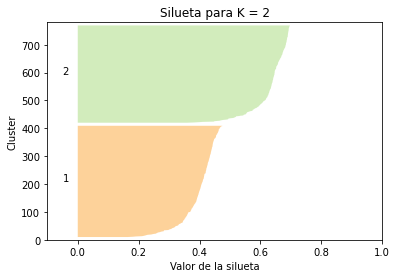

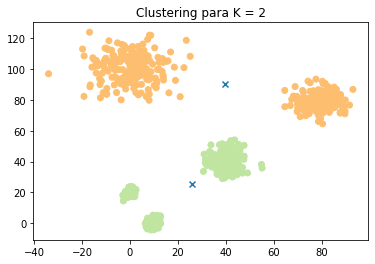

Para K =  3  el promedio de la silueta es de : 0.7209632392368184
 * Valor de silueta para  1  :  0.7906327407738116
 * Valor de silueta para  2  :  0.5909402999222135
 * Valor de silueta para  3  :  0.8788338815003836


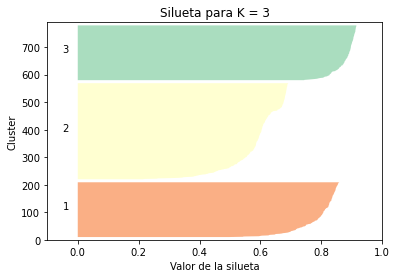

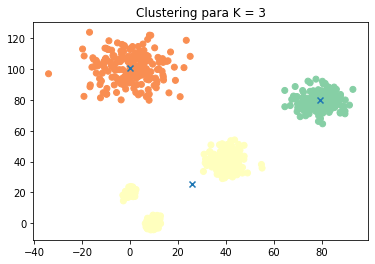

Para K =  4  el promedio de la silueta es de : 0.8025281600869639
 * Valor de silueta para  1  :  0.8305693095160249
 * Valor de silueta para  2  :  0.7725691370436917
 * Valor de silueta para  3  :  0.8351709704959324
 * Valor de silueta para  4  :  0.7615615776939538


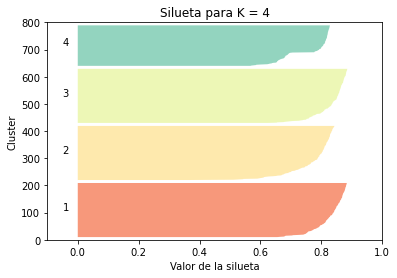

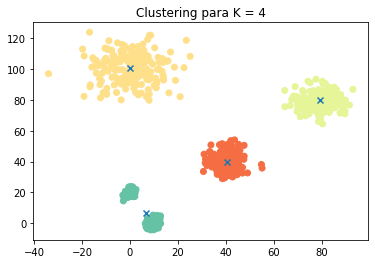

Para K =  5  el promedio de la silueta es de : 0.8189226194856601
 * Valor de silueta para  1  :  0.8225349842473224
 * Valor de silueta para  2  :  0.7717354772556189
 * Valor de silueta para  3  :  0.8351709704959324
 * Valor de silueta para  4  :  0.854700875051389
 * Valor de silueta para  5  :  0.8566718141866275


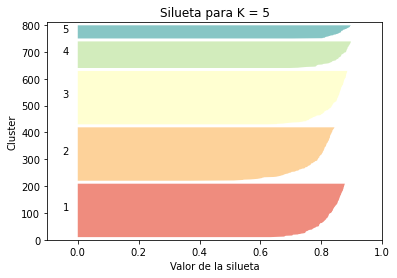

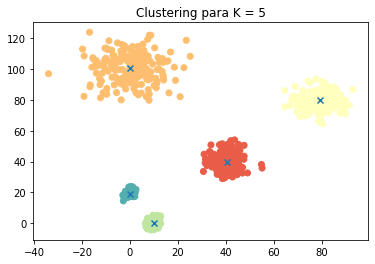

Para K =  6  el promedio de la silueta es de : 0.7004318279226256
 * Valor de silueta para  1  :  0.8351709704959324
 * Valor de silueta para  2  :  0.854700875051389
 * Valor de silueta para  3  :  0.3101908430511332
 * Valor de silueta para  4  :  0.8225349842473224
 * Valor de silueta para  5  :  0.34718904916534016
 * Valor de silueta para  6  :  0.8566718141866275


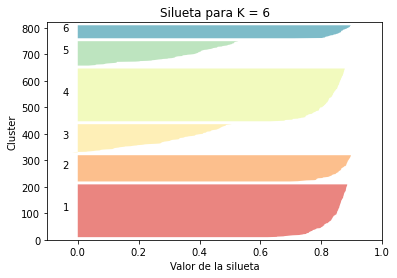

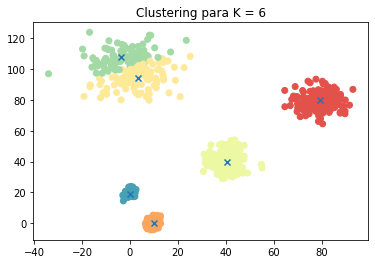

Para K =  7  el promedio de la silueta es de : 0.7031537232187844
 * Valor de silueta para  1  :  0.8225349842473224
 * Valor de silueta para  2  :  0.41086671366614064
 * Valor de silueta para  3  :  0.8351709704959324
 * Valor de silueta para  4  :  0.854700875051389
 * Valor de silueta para  5  :  0.3229345756496594
 * Valor de silueta para  6  :  0.8566718141866275
 * Valor de silueta para  7  :  0.2999093063984826


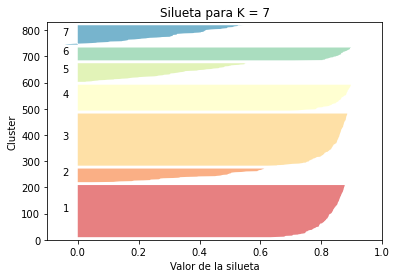

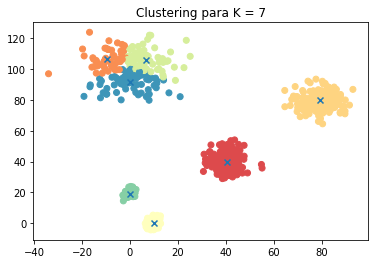

Para K =  8  el promedio de la silueta es de : 0.5639809270766979
 * Valor de silueta para  1  :  0.34384565022459296
 * Valor de silueta para  2  :  0.8198346881757801
 * Valor de silueta para  3  :  0.3611621685697637
 * Valor de silueta para  4  :  0.854700875051389
 * Valor de silueta para  5  :  0.27742810593565187
 * Valor de silueta para  6  :  0.3407309239798063
 * Valor de silueta para  7  :  0.8566718141866275
 * Valor de silueta para  8  :  0.32044916360999365


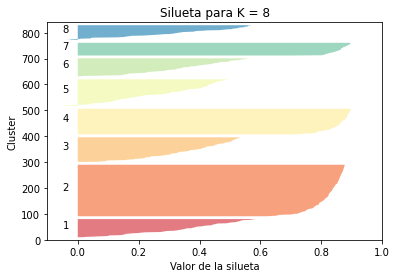

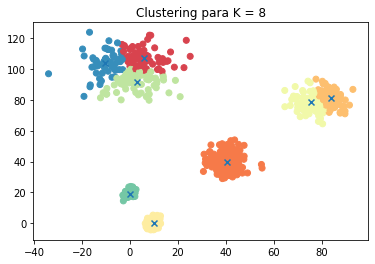

Para K =  9  el promedio de la silueta es de : 0.44139555628036675
 * Valor de silueta para  1  :  0.2776419387580546
 * Valor de silueta para  2  :  0.39823310576631143
 * Valor de silueta para  3  :  0.30932037543631075
 * Valor de silueta para  4  :  0.854700875051389
 * Valor de silueta para  5  :  0.31908060773788616
 * Valor de silueta para  6  :  0.31142222590833485
 * Valor de silueta para  7  :  0.8566718141866275
 * Valor de silueta para  8  :  0.3594030276567167
 * Valor de silueta para  9  :  0.3738859778213033


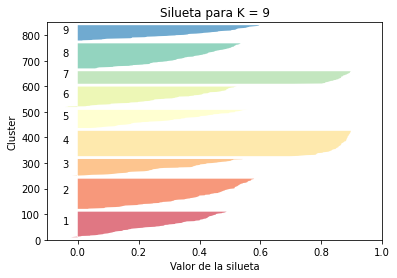

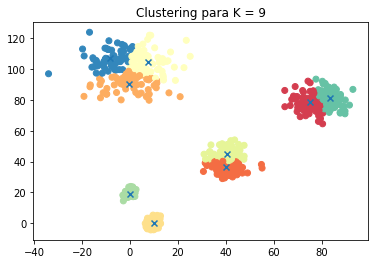

Para K =  10  el promedio de la silueta es de : 0.4380145136800033
 * Valor de silueta para  1  :  0.39318684593836256
 * Valor de silueta para  2  :  0.2849361876786549
 * Valor de silueta para  3  :  0.3127623072546185
 * Valor de silueta para  4  :  0.854700875051389
 * Valor de silueta para  5  :  0.3505853902547921
 * Valor de silueta para  6  :  0.3168264683368341
 * Valor de silueta para  7  :  0.3238065856513633
 * Valor de silueta para  8  :  0.30883651462399414
 * Valor de silueta para  9  :  0.8566718141866275
 * Valor de silueta para  10  :  0.3808923874668474


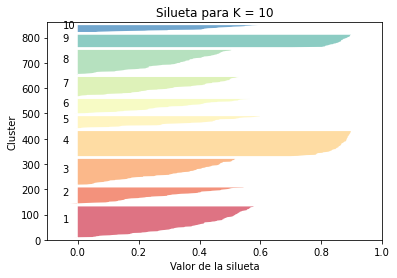

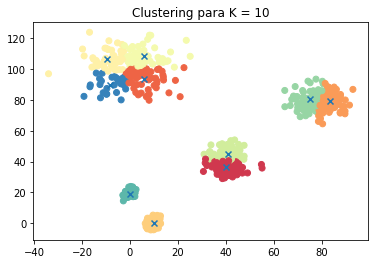

Para K =  11  el promedio de la silueta es de : 0.44574571813563335
 * Valor de silueta para  1  :  0.32405536638071153
 * Valor de silueta para  2  :  0.31159668000872653
 * Valor de silueta para  3  :  0.36696563252931025
 * Valor de silueta para  4  :  0.854700875051389
 * Valor de silueta para  5  :  0.8566718141866275
 * Valor de silueta para  6  :  0.27286560689021055
 * Valor de silueta para  7  :  0.39928631143046106
 * Valor de silueta para  8  :  0.37648048936081535
 * Valor de silueta para  9  :  0.3257949657147435
 * Valor de silueta para  10  :  0.32237773860868574
 * Valor de silueta para  11  :  0.3356131961247726


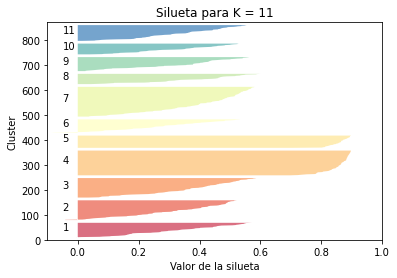

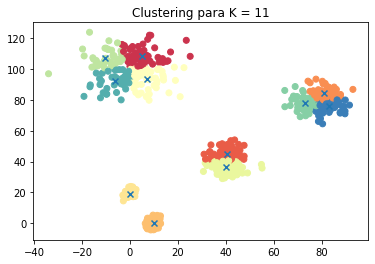

In [14]:
max_k = 12 ## maximo número de clusters que se crearán
K_range = range(2,max_k) 

for K in K_range:
    kmean_draw(data, K)

### Método del codo

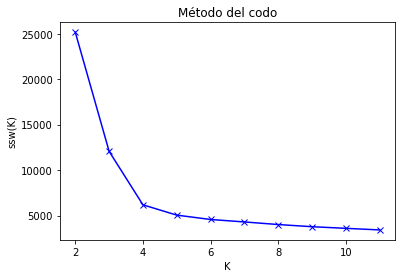

In [16]:
ssw = []
centroid = [sum(data)/len(data) for i in K_range]
sst = sum(np.min(cdist(data, centroid, "euclidean"), axis = 1))
    
for K in K_range:
    kmeanmodel = KMeans(n_clusters=K).fit(data)
    ssw_k = sum(np.min(cdist(data, kmeanmodel.cluster_centers_, "euclidean"), axis = 1))
    ssw.append(ssw_k)

# Dibujamos la grafica
plt.plot(K_range, ssw, "bx-")
plt.xlabel("K")
plt.ylabel("ssw(K)")
plt.title("Método del codo")
plt.show()

## Comparación K=4 vs K=5

El método del codo indica que el mejor corte seria de 4 clusters, pero la silueta parece homogenea con 5.

Para K =  4  el promedio de la silueta es de : 0.8025281600869639
 * Valor de silueta para  1  :  0.8305693095160249
 * Valor de silueta para  2  :  0.7725691370436917
 * Valor de silueta para  3  :  0.8351709704959324
 * Valor de silueta para  4  :  0.7615615776939538


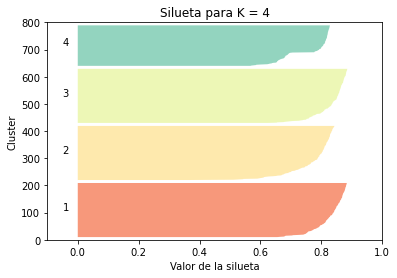

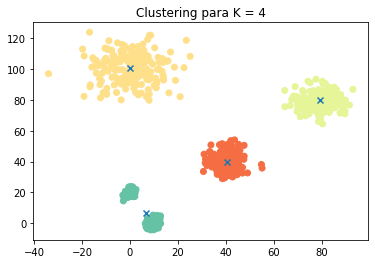

In [20]:
kmean_draw(data, 4)

Para K =  5  el promedio de la silueta es de : 0.8189226194856601
 * Valor de silueta para  1  :  0.7717354772556189
 * Valor de silueta para  2  :  0.8566718141866275
 * Valor de silueta para  3  :  0.8351709704959324
 * Valor de silueta para  4  :  0.8225349842473224
 * Valor de silueta para  5  :  0.854700875051389


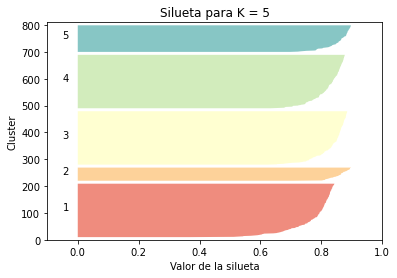

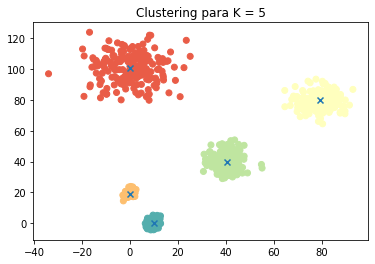

In [21]:
kmean_draw(data, 5)